This notebook provides some examples of visualizations made with FracMan outputs, outside of the normal FracMan capabilities. Many of these visualizations are geospatial and require Geopandas. The best (and by far easier) way to install Geopandas is using Miniconda.

https://docs.conda.io/en/latest/miniconda.html



In [1]:
from pathlib import Path
from typing import Tuple

import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn import linear_model
from shapely.geometry import LineString

from pyfracman.fab import parse_fab_file
from pyfracman.frac_geo import flatten_frac, get_mid_z
from pyfracman.well_geo import load_stage_location, load_survey_export, well_surveys_to_linestrings

In [2]:
data_dir = Path(r"C:\Users\scott.mckean\Desktop\spider_plots")

<AxesSubplot:>

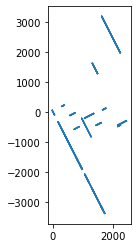

In [3]:
### Load fractures ###
frac_fpath = next(data_dir.rglob("Connected_Fracs_seismic_1.fab"))
fracs = parse_fab_file(frac_fpath)

# load fracture properties
prop_df = pd.DataFrame(fracs['prop_list'], columns = fracs['prop_dict'].values(), index=fracs['fid'])
prop_df.index.set_names('fid', inplace=True)

# load fracture geometry and flatten to 2D at midpoint of frac plane
frac_linestrings = list(map(flatten_frac, fracs['fracs']))
frac_mid_z = list(map(get_mid_z, fracs['fracs']))
frac_gdf = gpd.GeoDataFrame(prop_df, geometry=frac_linestrings)

# Make plot
frac_gdf.plot()

In [7]:
### load stages and surveys ###
surveys = pd.concat(
    [load_survey_export(well_path) for well_path in data_dir.glob("*_well.txt")]
)
survey_linestrings = well_surveys_to_linestrings(surveys)
stage_locs = pd.concat(
    [load_stage_location(well_path) for well_path in data_dir.glob("*_intervals.txt")]
)

# TODO: stage locations to linestrings.

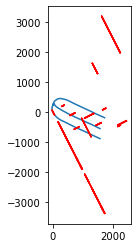

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
survey_linestrings.plot(ax = ax)
frac_gdf.plot(ax = ax, color='r')
ax.set_aspect('equal')
plt.show()

In [43]:

# Load stages
# Make plot
# Load results
# Make plot
# Make spider plot
# Redo histograms

,fid,Permeability,Compressibility,Aperture,Fracture Geometry,Set_Name,Distance2Well,FractureLength,FractureHeight
0,1,316.282,0.001,8.88898e-05,0,2,1050.94,133.881,25.6777
1,2,272.134,0.001,6.06439e-06,0,2,115.15,760.581,1.24458
2,3,170,0.001,0.000242713,0,2,95.5852,157.658,6.44753
3,4,96.7057,0.001,3.09983e-05,0,2,78.2191,603.266,150
4,5,45.888,0.001,0.000165139,0,2,96.9793,522.846,130.571
5,6,68.1896,0.001,8.44618e-05,0,2,222.504,131.829,0.472229
6,7,67.9948,0.001,0.0001401,0,2,66.556,205.753,18.1062
7,8,108.712,0.001,4.75716e-05,0,2,172.019,928.504,150
8,9,61.0575,0.001,8.47773e-05,0,2,319.864,264.671,6.03465
9,10,182.468,0.001,0.0001157,0,2,146.669,141.707,84.3213
